<a href="https://colab.research.google.com/github/Sidel-Meril/KAU_ML_2023/blob/main/kau_ml_midterm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

* Go to <a href="https://zno.testportal.com.ua/opendata"> OpenData portal of Independent Final Examination (IFE)</a>
* Download one or more datasets available there
* Analyze the dataset(s). I leave it as an open problem, thus you may perform any type of analysis you want. Few ideas listed below
   - [Find the best school based on the dataset(s) (define certain metric and perform anlysis, you should clearly state which metric you use and why)](#scrollTo=6b6bcf51)
   - [Find out if it's true that city schools pass IFE better than village schools](#scrollTo=8773a187)
   - [Find out whether there are any patterns in choosing examination subjects for men and women](#scrollTo=8773a187)
   - Any other interesting ideas you come up with

*Note:* I'll use two datasets: the last year (2022) and previous (2021) for comparsion of exam forms provided ministry of education

# Grading criteria:
* I expect a confident usage of basic ML tools we study: Python, libraries NumPy, Pandas, Matplotlib.
* I expect the ability of succinct, cohesive, and coherent expression of your thoughts, i.e. clearly state (in a few sentences) what is the problem you are solving and what approach do you propose.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np, re
import scipy.stats as sts
from IPython.display import Markdown as md
from IPython.display import display

# Downloading

In [ ]:
!pip install py7zr
from io import StringIO, BytesIO
from urllib.request import urlopen
import py7zr

def get_zip(url, file_type: str = '.csv'):
    r = urlopen(url)
    with py7zr.SevenZipFile(BytesIO(r.read()), mode='r') as archive:
        filename = list(filter(lambda name: file_type in name, archive.getnames()))
        return archive.read(targets=filename)[filename[0]]
zno_2021 = get_zip('https://zno.testportal.com.ua/yearstat/uploads/OpenDataZNO2021.7z')
nmt_2022 = get_zip('https://zno.testportal.com.ua/yearstat/uploads/OpenDataNMT2022.7z')

zno_2021_df = pd.read_csv(zno_2021, sep=';', decimal=',')
print(zno_2021_df.info())
nmt_2022_df = pd.read_csv(nmt_2022, sep=';', decimal=',')
print(nmt_2022_df.info())

del zno_2021, nmt_2022

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-122-a69f0dc60695>:14: DtypeWarning: Columns (117,118,121,123,124,125,126,137,138,141,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  zno_2021_df = pd.read_csv(zno_2021, sep=';', decimal=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389323 entries, 0 to 389322
Columns: 147 entries, OUTID to SpaPTTerName
dtypes: float64(40), int64(1), object(106)
memory usage: 436.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234104 entries, 0 to 234103
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OUTID          234104 non-null  object 
 1   Birth          234104 non-null  int64  
 2   SexTypeName    234104 non-null  object 
 3   RegName        234104 non-null  object 
 4   AREANAME       234104 non-null  object 
 5   TERNAME        234104 non-null  object 
 6   RegTypeName    234104 non-null  object 
 7   TerTypeName    234104 non-null  object 
 8   EONAME         196432 non-null  object 
 9   EOTypeName     196432 non-null  object 
 10  EORegName      196432 non-null  object 
 11  EOAreaName     196432 non-null  object 
 12  EOTerName      196432 non-null  object 
 13  EOParent       

# Review

This section examines what data are collected in both datasets

In [ ]:
print('NMT 2022 dataset')
display(nmt_2022_df.head(5))
print('EIT 2021 dataset')
zno_2021_df.head(5)

NMT 2022 dataset


,OUTID,Birth,SexTypeName,RegName,AREANAME,TERNAME,RegTypeName,TerTypeName,EONAME,EOTypeName,...,Block1Ball,Block2,Block2Ball100,Block2Ball,Block3,Block3Ball100,Block3Ball,PTRegName,PTAreaName,PTTerName
0,d60381f3-8d71-441e-817e-49b9fa8b43dd,2005,чоловіча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,14.0,Історія України,147.0,15.0,Математика,128.0,5.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
1,eb25a9fc-b757-4321-a2b4-ebb1b635397d,2005,чоловіча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,11.0,Історія України,149.0,17.0,Математика,136.0,8.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
2,1cb161bd-51ed-4d24-b605-1d45db63cada,2005,жіноча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,25.0,Історія України,158.0,24.0,Математика,185.0,28.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
3,0311b8d8-67bb-49a4-a0b9-f049b7ef4184,2005,жіноча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,20.0,Історія України,146.0,14.0,Математика,148.0,14.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
4,a8b35a53-feac-4e42-aed8-8d6ffab7decf,2005,чоловіча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,24.0,Історія України,144.0,13.0,Математика,144.0,12.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста


EIT 2021 dataset


,OUTID,Birth,SexTypeName,RegName,AREANAME,TERNAME,RegTypeName,TerTypeName,ClassProfileNAME,ClassLangName,...,SpaTest,SpaTestStatus,SpaBall100,SpaBall12,SpaDPALevel,SpaBall,SpaPTName,SpaPTRegName,SpaPTAreaName,SpaPTTerName
0,8a2abef7-625a-4253-8c14-000fe8a856e5,2003,чоловіча,Дніпропетровська область,м.Кам'янське,Дніпровський район міста,Студент закладу вищої освіти,місто,Молодший спеціаліст,українська,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3e975d01-9cc9-4072-bbcd-005b9da75096,2003,чоловіча,Кіровоградська область,м.Кропивницький,Фортечний район міста,Випускник загальноосвітнього навчального закла...,місто,Технологічний,українська,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58c926c3-8718-4845-918b-00155b917934,2003,чоловіча,Дніпропетровська область,м.Дніпро,Соборний район міста,Студент закладу вищої освіти,місто,Молодший спеціаліст,українська,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,443f89c2-84e7-4a56-bea3-005c776e0121,2004,жіноча,Кіровоградська область,м.Кропивницький,Фортечний район міста,Випускник загальноосвітнього навчального закла...,місто,Біолого-хімічний,українська,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0b7b2e81-a906-412f-ad74-005025fd9d29,2003,жіноча,Івано-Франківська область,Долинський район,м.Долина,Випускник загальноосвітнього навчального закла...,місто,Технологічний,українська,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(nmt_2022_df.describe().T)
display(zno_2021_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Birth,234104.0,2003.677746,3.783325,1952.0,2004.0,2005.0,2005.0,2009.0
Block1Ball100,214074.0,154.485645,18.912813,0.0,140.0,149.0,169.0,200.0
Block1Ball,214074.0,19.076604,7.616550,0.0,13.0,18.0,25.0,35.0
Block2Ball100,214074.0,151.103964,17.108930,0.0,140.0,148.0,158.0,200.0
Block2Ball,214074.0,17.826653,8.142661,0.0,11.0,16.0,24.0,35.0
Block3Ball100,214074.0,148.086363,19.556284,0.0,136.0,144.0,156.0,200.0
Block3Ball,214074.0,14.035960,7.734427,0.0,8.0,12.0,20.0,30.0


,count,mean,std,min,25%,50%,75%,max
Birth,389323.0,2002.788905,3.261747,1951.0,2003.00,2004.0,2004.0,2007.0
UMLBall100,222248.0,132.187124,46.457227,0.0,116.00,137.0,163.0,200.0
UMLBall12,199829.0,6.770729,2.488882,1.0,5.00,7.0,9.0,12.0
UMLBall,222248.0,57.485917,23.705681,0.0,39.00,54.0,75.0,116.0
UMLAdaptScale,250681.0,0.013563,0.266844,0.0,0.00,0.0,0.0,7.0
UkrBall100,288837.0,133.598230,45.616200,0.0,115.00,139.0,164.0,200.0
UkrBall12,60962.0,6.607805,2.649726,1.0,4.00,6.0,9.0,12.0
UkrBall,288837.0,37.529555,15.217836,0.0,25.00,36.0,49.0,74.0
UkrAdaptScale,373963.0,0.020023,0.340236,0.0,0.00,0.0,0.0,7.0
HistBall100,199373.0,111.670728,57.026783,0.0,103.00,124.0,148.0,200.0


In [ ]:
same_col_indx = zno_2021_df.columns.isin(nmt_2022_df.columns)
same_col = zno_2021_df.columns[same_col_indx]
cat_zno = zno_2021_df.columns[~zno_2021_df.columns.isin(same_col)][zno_2021_df.dtypes[~zno_2021_df.columns.isin(same_col)] == np.object]
cat_nmt = nmt_2022_df.columns[~nmt_2022_df.columns.isin(same_col)][nmt_2022_df.dtypes[~nmt_2022_df.columns.isin(same_col)] == np.object]

display(md('The same features for **EIT** and **NMT**\n+ '+'\n+ '.join(same_col)))
display(md('Categorical **EIT** \n+ '+'\n+ '.join(cat_zno)))
display(md('Categorical **NMT** \n+ '+'\n+ '.join(cat_nmt)))

<ipython-input-125-8b668f01b3f1>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_zno = zno_2021_df.columns[~zno_2021_df.columns.isin(same_col)][zno_2021_df.dtypes[~zno_2021_df.columns.isin(same_col)] == np.object]
<ipython-input-125-8b668f01b3f1>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_nmt = nmt_2022_df.columns[~nmt_2022_df.columns.isin(same_col)][nmt_2022_df.dtypes[~nmt_2022_df.columns.isin(same_col)] == np.object]


The same features for **EIT** and **NMT**
+ OUTID
+ Birth
+ SexTypeName
+ RegName
+ AREANAME
+ TERNAME
+ RegTypeName
+ TerTypeName
+ EONAME
+ EOTypeName
+ EORegName
+ EOAreaName
+ EOTerName
+ EOParent

Categorical **EIT** 
+ ClassProfileNAME
+ ClassLangName
+ UMLTest
+ UMLTestStatus
+ UMLPTName
+ UMLPTRegName
+ UMLPTAreaName
+ UMLPTTerName
+ UkrTest
+ UkrSubTest
+ UkrTestStatus
+ UkrPTName
+ UkrPTRegName
+ UkrPTAreaName
+ UkrPTTerName
+ HistTest
+ HistLang
+ HistTestStatus
+ HistPTName
+ HistPTRegName
+ HistPTAreaName
+ HistPTTerName
+ MathTest
+ MathLang
+ MathTestStatus
+ MathDpaLevel
+ MathPTName
+ MathPTRegName
+ MathPTAreaName
+ MathPTTerName
+ MathStTest
+ MathStLang
+ MathStTestStatus
+ MathStPTName
+ MathStPTRegName
+ MathStPTAreaName
+ MathStPTTerName
+ PhysTest
+ PhysLang
+ PhysTestStatus
+ PhysPTName
+ PhysPTRegName
+ PhysPTAreaName
+ PhysPTTerName
+ ChemTest
+ ChemLang
+ ChemTestStatus
+ ChemPTName
+ ChemPTRegName
+ ChemPTAreaName
+ ChemPTTerName
+ BioTest
+ BioLang
+ BioTestStatus
+ BioPTName
+ BioPTRegName
+ BioPTAreaName
+ BioPTTerName
+ GeoTest
+ GeoLang
+ GeoTestStatus
+ GeoPTName
+ GeoPTRegName
+ GeoPTAreaName
+ GeoPTTerName
+ EngTest
+ EngTestStatus
+ EngDPALevel
+ EngPTName
+ EngPTRegName
+ EngPTAreaName
+ EngPTTerName
+ FraTest
+ FraTestStatus
+ FraDPALevel
+ FraPTName
+ FraPTRegName
+ FraPTAreaName
+ FraPTTerName
+ DeuTest
+ DeuTestStatus
+ DeuDPALevel
+ DeuPTName
+ DeuPTRegName
+ DeuPTAreaName
+ DeuPTTerName
+ SpaTest
+ SpaTestStatus
+ SpaDPALevel
+ SpaPTName
+ SpaPTRegName
+ SpaPTAreaName
+ SpaPTTerName

Categorical **NMT** 
+ Test
+ TestDate
+ TestStatus
+ Block1
+ Block2
+ Block3
+ PTRegName
+ PTAreaName
+ PTTerName

In [ ]:
for col in same_col:
    if 'TypeName' in col:
        display(md('\n+ '+col))
        display(zno_2021_df[col].value_counts())
        display(nmt_2022_df[col].value_counts())        


+ SexTypeName

чоловіча    196250
жіноча      193073
Name: SexTypeName, dtype: int64

жіноча      122311
чоловіча    111793
Name: SexTypeName, dtype: int64


+ RegTypeName

Випускник загальноосвітнього навчального закладу 2021 року                                               219640
Студент закладу вищої освіти                                                                              69684
Випускник минулих років                                                                                   51009
Учень (слухач) закладу професійної (професійно-технічної) освіти                                          48954
Випускник, який здобуде в 2021 році повну загальну середню освіту в навчальному закладі іншої держави        36
Name: RegTypeName, dtype: int64

Випускник закладу загальної середньої освіти 2022 року                                             166252
Випускник минулих років                                                                             36129
Студент закладу вищої/фахової передвищої освіти                                                     24793
Учень (слухач) закладу професійної (професійно-технічної) освіти                                     6815
Випускник, який здобуде в 2022 році повну загальну середню освіту в закордонному закладі освіти        89
Установа виконання покарань                                                                            26
Name: RegTypeName, dtype: int64


+ TerTypeName

місто                   284190
селище, село             73618
селище міського типу     31515
Name: TerTypeName, dtype: int64

місто                   170823
селище, село             44514
селище міського типу     18767
Name: TerTypeName, dtype: int64


+ EOTypeName

середня загальноосвітня школа                       117763
заклад професійної (професійно-технічної) освіти     48714
заклад фахової передвищої освіти                     46341
ліцей                                                38406
навчально-виховний комплекс                          25736
заклад вищої освіти                                  23046
спеціалізована школа                                 17328
гімназія                                             16661
навчально-виховне об'єднання                          2018
колегіум/колеж                                         878
загальноосвітня санаторна школа                        368
вечірня (змінна) школа                                 269
спеціальна загальноосвітня школа                       199
навчально-реабілітаційний центр                         14
Name: EOTypeName, dtype: int64

середня загальноосвітня школа                                  70237
ліцей                                                          53003
заклад фахової передвищої освіти                               19502
навчально-виховний комплекс                                    13683
спеціалізована школа                                           13422
гімназія                                                       12001
заклад професійної (професійно-технічної) освіти                6462
заклад вищої освіти                                             4190
навчально-виховне об'єднання                                    1386
колегіум/колеж                                                   655
ліцей із посиленою військово-фізичною підготовкою                489
науковий ліцей                                                   408
спортивний ліцей                                                 308
загальноосвітня санаторна школа                                  272
військовий (військово-морський, ві

In [ ]:
nmt_subj = ['Block'+str(i) for i in range(1,4)]
zno_subj = ['UML', 'Ukr', 'Hist', 'MathSt', 'Math', 'Phys', 'Chem', 'Bio', 'Geo', 'Eng', 'Fra', 'Deu', 'Spa']
nmt_subj_col = list(filter(lambda x: len(re.findall('|'.join(nmt_subj),x))>0, nmt_2022_df.columns[~nmt_2022_df.columns.isin(same_col)]))
zno_subj_col = list(filter(lambda x: len(re.findall('|'.join(zno_subj),x))>0, zno_2021_df.columns[~zno_2021_df.columns.isin(same_col)]))

nmt_subj_features = list(set([re.sub('|'.join(nmt_subj), '', col) for col in nmt_subj_col]))
zno_subj_features = list(set([re.sub('|'.join(zno_subj), '', col) for col in zno_subj_col]))

In [ ]:
display(md('Subjects features **EIT** \n+ '+'\n+ '.join(zno_subj_features)))
display(md('Subjects features **NMT** \n+ '+'\n+ '.join(nmt_subj_features[1:])))

Subjects features **EIT** 
+ DpaLevel
+ PTRegName
+ Lang
+ DPALevel
+ Ball100
+ PTTerName
+ SubTest
+ AdaptScale
+ Ball12
+ Test
+ PTAreaName
+ Ball
+ TestStatus
+ PTName

Subjects features **NMT** 
+ Ball100
+ Ball

In [ ]:
for feature in zno_subj_features:
    try:
        if zno_2021_df.dtypes['Math'+feature]!=np.float64:
            display(md('\n+ '+feature))
            display(zno_2021_df['Math'+feature].value_counts())
        else:
            display(md('\n+ '+feature))
            display(zno_2021_df['Math'+feature].describe())
    except KeyError:
        pass


+ DpaLevel

стандарт(академічний)    229986
профільний                30314
Name: MathDpaLevel, dtype: int64


+ PTRegName

м.Київ                       27505
Дніпропетровська область     24866
Львівська область            20669
Одеська область              19185
Харківська область           18327
Запорізька область           12927
Донецька область             12639
Вінницька область            12537
Київська область             12481
Івано-Франківська область    10840
Рівненська область           10266
Житомирська область          10108
Полтавська область            9578
Хмельницька область           9382
Волинська область             9214
Закарпатська область          8501
Тернопільська область         8493
Черкаська область             7867
Миколаївська область          7725
Сумська область               7482
Херсонська область            7300
Чернігівська область          7102
Чернівецька область           6186
Кіровоградська область        5996
Луганська область             4613
Name: MathPTRegName, dtype: int64


+ Lang

українська    291789
Name: MathLang, dtype: int64


+ Ball100

count    244202.000000
mean         95.058869
std          67.542058
min           0.000000
25%           0.000000
50%         116.000000
75%         147.000000
max         200.000000
Name: MathBall100, dtype: float64


+ PTTerName

Шевченківський район міста    12595
Київський район міста          6315
Дніпровський район міста       6215
м.Вінниця                      6150
Деснянський район міста        5078
                              ...  
м.Корюківка                     155
м.Ржищів                        151
м.Ланівці                       142
с.Горбова                        93
м.Вижниця                        83
Name: MathPTTerName, Length: 344, dtype: int64


+ Ball12

count    220216.000000
mean          5.319554
std           2.736655
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          12.000000
Name: MathBall12, dtype: float64


+ Test

Математика    291789
Name: MathTest, dtype: int64


+ PTAreaName

м.Вінниця                            6150
м.Рівне                              4080
м.Київ. Святошинський район міста    4027
м.Хмельницький                       4017
м.Київ. Солом'янський район міста    3771
                                     ... 
Шумський район                        155
Корюківський район                    155
м.Ржищів                              151
Лановецький район                     142
Герцаївський район                     93
Name: MathPTAreaName, Length: 351, dtype: int64


+ Ball

count    244202.000000
mean         19.605118
std          14.488172
min           0.000000
25%           8.000000
50%          14.000000
75%          28.000000
max          67.000000
Name: MathBall, dtype: float64


+ TestStatus

Зараховано           168369
Не подолав поріг      75833
Не з’явився           47247
Анульовано              208
Не обрано 100-200       132
Name: MathTestStatus, dtype: int64


+ PTName

Загальноосвітня школа І-ІІІ ступенів смт. Гусятин Гусятинський район Тернопільська область                                                                                             376
Городоцький ліцей №4 Городоцької міської ради Хмельницької області                                                                                                                     374
Комунальний заклад загальної середньої освіти І-ІІІ ступенів №3 Березівської міської ради Одеської області                                                                             373
Бучацький ліцей                                                                                                                                                                        365
Первомайська загальноосвітня школа I-III ступенів №16 ім. Героя Радянського Cоюзу Я. М. Лобова Первомайської міської ради Миколаївської області                                        364
                                                                 

In [ ]:
for feature in zno_subj_features:
    try:
        if zno_2021_df.dtypes['Spa'+feature]!=np.float64:
            display(md('\n+ '+feature))
            display(zno_2021_df['Spa'+feature].value_counts().T)
        else:
            display(md('\n+ '+feature))
            display(zno_2021_df['Spa'+feature].describe())
    except KeyError:
        pass


+ PTRegName

м.Київ                       103
Львівська область             29
Харківська область            12
Дніпропетровська область      10
Одеська область               10
Херсонська область            10
Запорізька область             7
Полтавська область             6
Чернівецька область            5
Івано-Франківська область      5
Тернопільська область          4
Закарпатська область           3
Сумська область                3
Кіровоградська область         3
Миколаївська область           2
Вінницька область              2
Рівненська область             2
Житомирська область            2
Донецька область               2
Хмельницька область            2
Волинська область              1
Луганська область              1
Name: SpaPTRegName, dtype: int64


+ DPALevel

профільний               27
стандарт(академічний)    22
Name: SpaDPALevel, dtype: int64


+ Ball100

count    150.000000
mean     135.953333
std       64.475825
min        0.000000
25%      112.500000
50%      163.000000
75%      182.000000
max      200.000000
Name: SpaBall100, dtype: float64


+ PTTerName

Печерський район міста                 103
Галицький район міста                   29
Київський район міста                   12
Приморський район міста                 10
Суворовський район міста                10
Амур-Нижньодніпровський район міста      9
Вознесенівський район міста              7
Подільський район міста                  6
м.Івано-Франківськ                       5
м.Чернівці                               5
м.Тернопіль                              4
Фортечний район міста                    3
Ковпаківський район міста                3
м.Ужгород                                3
Заводський район міста                   2
м.Рівне                                  2
м.Вінниця                                2
Центральний район міста                  2
Богунський район міста                   2
м.Хмельницький                           2
м.Сєвєродонецьк                          1
м.Луцьк                                  1
Центрально-Міський район міста           1
Name: SpaPT


+ Ball12

count    39.000000
mean      8.333333
std       2.688507
min       3.000000
25%       6.000000
50%       8.000000
75%      10.000000
max      12.000000
Name: SpaBall12, dtype: float64


+ Test

Іспанська мова    224
Name: SpaTest, dtype: int64


+ PTAreaName

м.Київ. Печерський район міста                   103
м.Львів. Галицький район міста                    29
м.Харків. Київський район міста                   12
м.Одеса. Приморський район міста                  10
м.Херсон. Суворовський район міста                10
м.Дніпро. Амур-Нижньодніпровський район міста      9
м.Запоріжжя. Вознесенівський район міста           7
м.Полтава. Подільський район міста                 6
м.Івано-Франківськ                                 5
м.Чернівці                                         5
м.Тернопіль                                        4
м.Кропивницький. Фортечний район міста             3
м.Суми. Ковпаківський район міста                  3
м.Ужгород                                          3
м.Миколаїв. Заводський район міста                 2
м.Рівне                                            2
м.Вінниця                                          2
м.Маріуполь. Центральний район міста               2
м.Житомир. Богунський район міста             


+ Ball

count    150.000000
mean      44.206667
std       19.995065
min        9.000000
25%       24.250000
50%       51.000000
75%       61.000000
max       72.000000
Name: SpaBall, dtype: float64


+ TestStatus

Зараховано           127
Не з’явився           71
Не подолав поріг      23
Анульовано             2
Не обрано 100-200      1
Name: SpaTestStatus, dtype: int64


+ PTName

Школа І-ІІІ ступенів №90 Печерського району міста Києва                                                                                                     103
Львівська лінгвістична гімназія Львівської міської ради Львівської області                                                                                   29
ХАРКІВСЬКА ЗАГАЛЬНООСВІТНЯ ШКОЛА I-III СТУПЕНІВ № 5 ХАРКІВСЬКОЇ МІСЬКОЇ РАДИ ХАРКІВСЬКОЇ ОБЛАСТІ                                                             12
Одеська спеціалізована школа № 35 I-III ступенів з поглибленим вивченням англійської мови Одеської міської ради Одеської області                             10
Херсонська загальноосвітня школа I-III ступенів №4 Херсонської міської ради                                                                                  10
Комунальний заклад освіти "Спеціалізована школа № 134 гуманістичного навчання та виховання" Дніпровської міської ради                                         9
Запорізька гімназія № 25 гуманітарного п

In [ ]:
for feature in nmt_subj_features[1:]:
    try:
        if nmt_2022_df.dtypes['Block1'+feature]!=np.float64:
            display(md('\n+ '+feature))
            display(nmt_2022_df['Block1'+feature].value_counts())
        else:
            display(md('\n+ '+feature))
            display(nmt_2022_df['Block1'+feature].describe())
    except KeyError:
        pass


+ Ball100

count    214074.000000
mean        154.485645
std          18.912813
min           0.000000
25%         140.000000
50%         149.000000
75%         169.000000
max         200.000000
Name: Block1Ball100, dtype: float64


+ Ball

count    214074.000000
mean         19.076604
std           7.616550
min           0.000000
25%          13.000000
50%          18.000000
75%          25.000000
max          35.000000
Name: Block1Ball, dtype: float64

Subjects features:
+ Ball12 - 12-point score, failed is NaN
+ Ball100 - 12-point score, failed is NaN/0 (depence of status)
+ TestStatus

# Functions

In [ ]:
#Some helper functions used for visualization and tests

def plot_pmf(features, df, cols=3, suptitle='Distributions', group_by = None):
    rows = len(features)//cols+len(features)%cols
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 6))
    ax = ax.flatten()
    if group_by != None:
        features = zip(features, group_by)
    
    for i, subj in enumerate(features):
        if group_by != None:
            subj, subj_name = subj
            mask = df[subj].notnull() & df[subj]>0 
            df.hist(column=subj, by=subj_name, bins=12, ax=ax[i])
        else:
            mask = df[subj].notnull() & df[subj]>0 
            df[subj][mask].hist(bins=12, ax=ax[i])
            ax[i].set_title(subj)
        ax[i].axvline(x=df[subj].mean(), c='r')
        
    fig.suptitle(suptitle)
    
def plot_pie(features, df, cols=1, suptitle='Counts'):
    rows = len(features)//cols+len(features)%cols
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 8))
    ax = ax.flatten()
    
    for i, subj in enumerate(features):
        counts = (df[df[subj].notnull()][subj]>0).value_counts()
        print(counts.head())
        counts.plot.pie(ax=ax[i])
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(subj)
    fig.suptitle(suptitle)
    
def u_test(features, df, p=0.95):
    print('Subject\t Is H_0 rejected\t p-value')
    for subj in features:
        mask = df[subj].notnull() & df[subj]>0 
        data = df[mask][subj].to_numpy()
        distrib = sts.norm.rvs(size=len(data), loc=data.mean(), scale=np.sqrt(data.std())).astype(int)
        v, p_res = sts.mannwhitneyu(data, distrib, use_continuity=False)
        print(subj+'\t',p_res<(1-p),  "\t{0:.0f}%".format((p_res)*100))
        
def t_test(series1, series2, name=''):
    mask = series1.notnull() & series1>0 - 100
    data = series1[mask].to_numpy()
    mask = series2.notnull() & series2>0 - 100
    distrib = series2[mask].to_numpy()
    v, p_res = sts.ttest_ind(data, distrib, alternative='less')
    print(f'{name} t-test\t', v,'\t', p_res)

## The best school based on the dataset(s)

The best school according to the results of the External Independent Testing (EIT) and the National Multitest (NMT) is the one with the best grades in all subjects. 

We assume that grades are normally distributed. Thus, we obtain two hypotheses, which are further tested by the Mann-Whitney U test

$H_0$: $P(V_{subj}) \not= {N}(\mu_{subj},\sigma_{subj})$

$H_1$: $P(V_{subj}) \sim {N}(\mu_{subj},\sigma_{subj})$

If the first hypothesis is true, then the generalized grade for each subject is expressed as 

$v_{subj} \sim \mu_{subj} \pm \sigma_{subj}$

where

+ $\mu_{subj}$ is mean
+ $\sigma_{subj}$ is variance of estimation

Then, according to the Central Limit Theorem, we have that the sum of the scores of each subject also follows a normal distribution:

> $S_{n}=\sum \limits _{i=1}^{n}X_{i}$

> ${\frac  {S_{n}-\mu n}{\sigma {\sqrt  n}}}\to N(0,1)$

Than the best school can be estimated by

$\max(\frac{\sum_{subj}^{n_{subj}} \mu_{subj}}{n_{subj}}, \frac{n_{subj}}{\sum_{subj}^{n_{subj}} \sigma_{subj}})$

where

+ $n_{subj}$ count of choosed subjects for estimation

Note: we cannot consider schools whose results are not representative. This means that schools that submitted too small a sample for evaluation (i.e., too few students) cannot participate in the competition. Under the assumption that the number of students from each school has a [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution), we can use the [Pareto rule of 20-80](https://en.wikipedia.org/wiki/Pareto_principle), taking the smallest proportion for evaluation. 

In addition, we conducted a qualitative assessment of each of the tests by the number of students who passed the minimum score threshold.

All conclusions are presented at the end of the section. 

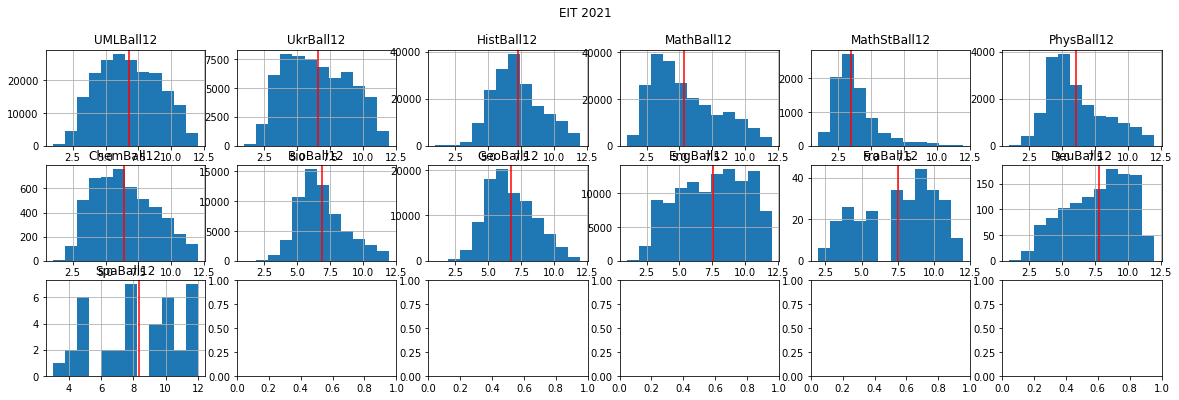

In [ ]:
# Visualizing PMF for EIT

features_zno = list(filter(lambda x: 'Ball12' in x, zno_2021_df.columns))
names_zno = list(filter(lambda x: 'Test' in x.replace('TestStatus',''), zno_2021_df.columns))
features_zno_100 = list(filter(lambda x: 'Ball100' in x, zno_2021_df.columns))

plot_pmf(features_zno, zno_2021_df, cols=6, suptitle='EIT 2021')

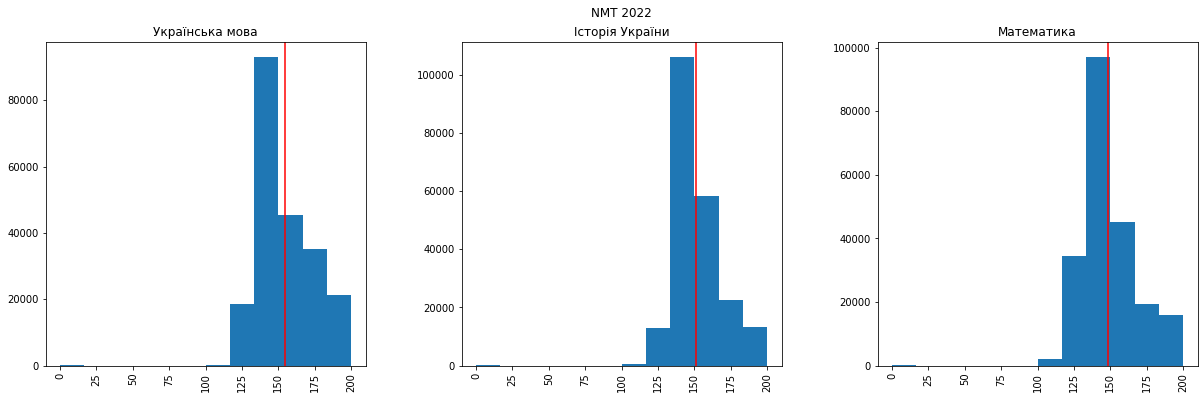

In [ ]:
# Visualizing PMF for NMT

features_nmt = [f'Block{i}Ball100' for i in range(1,4)]
names_nmt = [f'Block{i}' for i in range(1,4)]

plot_pmf(features_nmt, nmt_2022_df, cols=3, suptitle='NMT 2022', group_by=names_nmt)

In [ ]:
# Testing of hypotesis about normality of distributions for EIT & NMT

u_test(features_zno, zno_2021_df)
u_test(features_nmt, nmt_2022_df)

Subject	 Is H_0 rejected	 p-value
UMLBall12	 True 	0%
UkrBall12	 True 	0%
HistBall12	 True 	0%
MathBall12	 True 	0%
MathStBall12	 True 	0%
PhysBall12	 True 	0%
ChemBall12	 True 	0%
BioBall12	 True 	0%
GeoBall12	 True 	0%
EngBall12	 True 	0%
FraBall12	 True 	0%
DeuBall12	 True 	0%
SpaBall12	 False 	21%
Subject	 Is H_0 rejected	 p-value
Block1Ball100	 True 	0%
Block2Ball100	 True 	0%
Block3Ball100	 True 	0%


True     204768
False     17480
Name: UMLBall100, dtype: int64
True     267635
False     21202
Name: UkrBall100, dtype: int64
True     163532
False     35841
Name: HistBall100, dtype: int64
True     168369
False     75833
Name: MathBall100, dtype: int64
True     21275
False     1927
Name: PhysBall100, dtype: int64
True     8760
False    1049
Name: ChemBall100, dtype: int64
True     79514
False     1898
Name: BioBall100, dtype: int64
True     107045
False      6071
Name: GeoBall100, dtype: int64
True     114139
False     13575
Name: EngBall100, dtype: int64
True     377
False     37
Name: FraBall100, dtype: int64
True     1617
False     208
Name: DeuBall100, dtype: int64
True     127
False     23
Name: SpaBall100, dtype: int64
True     213927
False       147
Name: Block1Ball100, dtype: int64
True     213738
False       336
Name: Block2Ball100, dtype: int64
True     213805
False       269
Name: Block3Ball100, dtype: int64


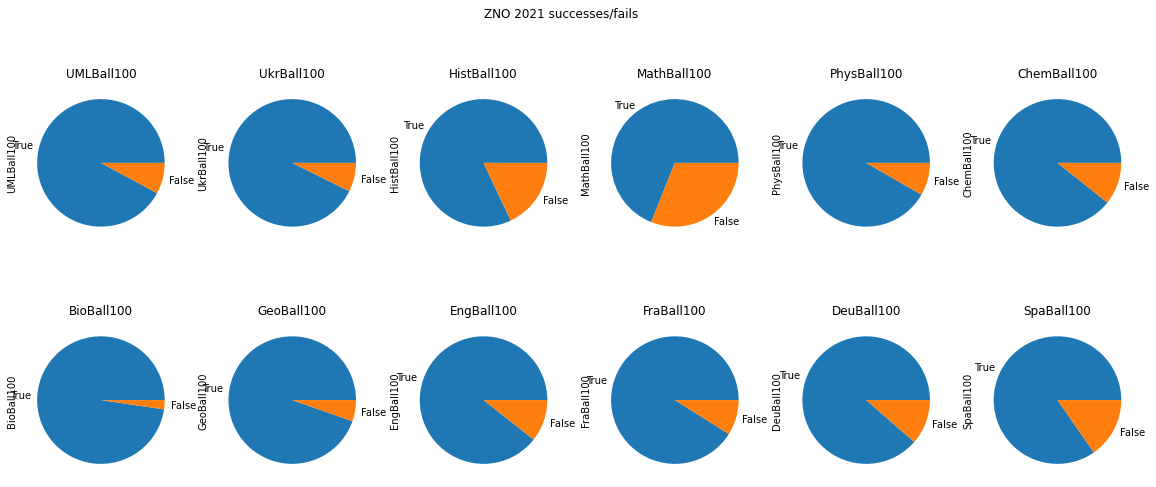

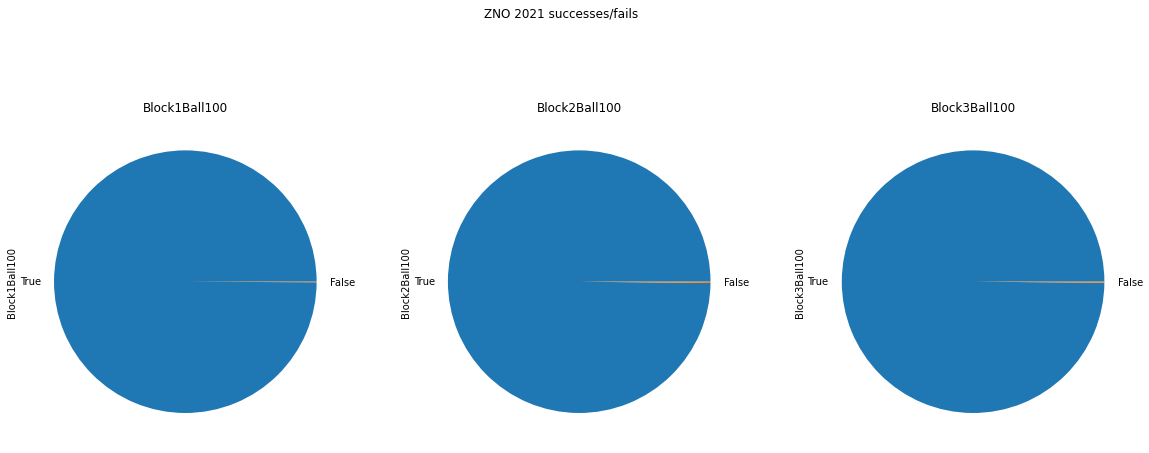

In [ ]:
# Ploting a pie with counts of students which successfully passed test and counterwise

plot_pie(features_zno_100, zno_2021_df, cols=6, suptitle='ZNO 2021 successes/fails' )
plot_pie(features_nmt, nmt_2022_df, cols=3, suptitle='ZNO 2021 successes/fails' )

*Note:* for further analysis we used only the most excepted subjects. 

For EIT:
+ UML
+ Math
+ Hist
+ English

so for EIT $n_{subj}=4$

For NMT (all represented blocks):
+ UML (block 1)
+ Hist (block 2)
+ Math (block 3)

so for NMT $n_{subj}=3$


NMT students per school 31.0 
ZNO students per school 48.0


2022`s schools count: 1943


2021`s schools count: 2085


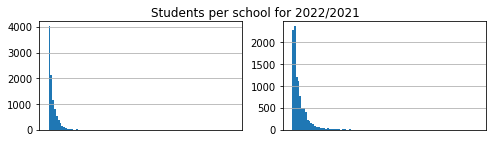

In [ ]:
# Selecting schools and counting students for each
nmt_schools = nmt_2022_df['EONAME'].value_counts()
zno_schools = zno_2021_df['EONAME'].value_counts()

# Counts of students which was tested from each school have Pareto distribution
# I excluding schools which proposed too small count of students
# Used Pareto rule 80-20 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,2))
nmt_schools.hist(bins=100, ax=ax[0])
ax[0].set_xticks([])
zno_schools.hist(bins=100, ax=ax[1])
ax[1].set_xticks([])

fig.suptitle('Students per school for 2022/2021')
print('\nNMT students per school', nmt_schools.quantile(0.8), 
     '\nZNO students per school', zno_schools.quantile(0.8))
nmt_schools = nmt_schools.loc[lambda count: count>nmt_schools.quantile(0.8)]
zno_schools = zno_schools.loc[lambda count: count>zno_schools.quantile(0.8)]
print('\n\n2022`s schools count:', len(nmt_schools))
print('\n\n2021`s schools count:', len(zno_schools))

In [ ]:
# Calculating main metrics: standart deviation as error and mean as value
def get_metrics(schools: pd.Series, subjects: list [str], df: pd.DataFrame):
    zero2nan = df.replace(0, np.NaN)
    grouped = zero2nan.groupby('EONAME', dropna=True)
    mean = (grouped[subjects].mean().sum(1)/len(subjects)).loc[schools.keys()]
    std = (grouped[subjects].std().sum(1)/len(subjects)).loc[schools.keys()]
    
    return mean, std

# Zip results
def  get_rating(schools, mean, std, df) -> pd.DataFrame:
    rating = pd.DataFrame({'school': mean.index,
              'mean':mean.values,
              'std': std.values})
    rating.sort_values(by='mean', inplace = True, ascending=False)
    return rating.reset_index(drop=True)

In [ ]:
def approx_poly2(x, y):
  x, y = x.to_numpy().copy(), y.to_numpy().copy()
  nonnans = np.isfinite(x) & np.isfinite(y)
  curve, res, _, _, _  = np.polyfit(x[nonnans],y[nonnans],2, full=True, rcond=1e-4)
  print(res / (nonnans.sum() - 3))
  func = np.poly1d(curve)
  sorted_mean = np.sort(x[nonnans])
  vals = func(sorted_mean)
  return sorted_mean, vals, curve, func

[0.0102357]
151.1925174689441 Любомльський заклад загальної середньої освіти І-ІІІ ступенів №2 Любомльської міської ради    151.192517
dtype: float64


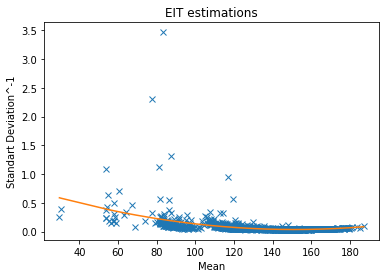

In [ ]:
# Selecting subjects for estimation
cat = 'Ball100'
zno_subjects = [f'Math{cat}', f'Eng{cat}', f'UML{cat}', f'Hist{cat}']

zno_grouped = zno_2021_df.groupby('EONAME', dropna=True)
zno_mean, zno_std = get_metrics(zno_schools, zno_subjects, zno_2021_df)
zno_x, zno_approx, _, __ = approx_poly2(zno_mean, 1/zno_std)

#Ploting estimated scores for NMT
plt.plot(zno_mean, 1/zno_std, 'x')
plt.plot(zno_x, zno_approx)
plt.xlabel('Mean')
plt.ylabel('Standart Deviation^-1')
plt.title('EIT estimations')
zno_min = np.where(zno_mean==zno_x[zno_approx.argmin()])[0]
print(zno_x[zno_approx.argmin()], zno_mean[zno_min])

[4.9066503e-05]
Комунальний заклад "Опорний заклад "Кодимський ліцей №1" Кодимської міської ради Подільського району Одеської області    163.235294
dtype: float64


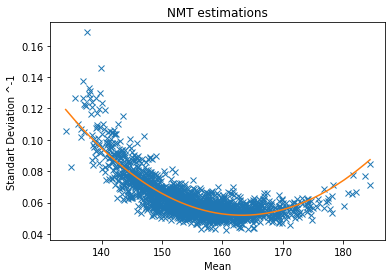

In [ ]:
cat = 'Ball100'
subjects_ = {f'Block1{cat}': 'UML', f'Block3{cat}': 'Math', f'Block2{cat}': 'Hist'}
nmt_subjects = [f'Block1{cat}', f'Block3{cat}', f'Block2{cat}']

nmt_mean, nmt_std = get_metrics(nmt_schools, nmt_subjects, nmt_2022_df)
nmt_x, nmt_approx, _, __ = approx_poly2(nmt_mean, 1/nmt_std)

#Ploting estimated scores for NMT
plt.plot(nmt_mean, 1/nmt_std, 'x')
plt.plot(nmt_x, nmt_approx)
plt.xlabel('Mean')
plt.ylabel('Standart Deviation ^-1')
plt.title('NMT estimations')
nmt_min = np.where(nmt_mean==nmt_x[nmt_approx.argmin()])[0]
print(nmt_mean[nmt_min] )

In [ ]:
#EIT schools rating
zno_rating = get_rating(zno_schools, zno_mean, zno_std, zno_2021_df)
print('EIT schools rating\n')
display(zno_rating.head(15))

nmt_rating = get_rating(nmt_schools, nmt_mean, nmt_std, nmt_2022_df)
print('NMT schools rating\n')
display(nmt_rating.head(15))

EIT schools rating



,school,mean,std
0,"Ліцей ""Інтелект""",187.072398,9.835964
1,Черкаський фізико-математичний ліцей (ФІМЛІ) Ч...,184.996814,14.472525
2,Ліцей ім. Миколи Сабата Івано-Франківської міс...,183.617546,13.691751
3,"Львівська гімназія ""Євшан""",180.850052,13.432505
4,Калуський ліцей імені Дмитра Бахматюка Калуськ...,180.565549,15.430530
5,"Гімназія ""Києво - Могилянський колегіум"" ІІ-ІІ...",179.510841,16.683798
6,Гімназія №178 Солом'янського району м.Києва,179.384908,19.120651
7,"Комунальний заклад освіти ""Українсько-Американ...",179.356733,15.813039
8,Херсонська спеціалізована школа І-ІІІ ступенів...,179.098092,16.293133
9,Ліцей №208 м. Києва,178.666266,16.442304


NMT schools rating



,school,mean,std
0,Львівський фізико-математичний ліцей-інтернат ...,184.414141,14.093502
1,"КОМУНАЛЬНИЙ ЗАКЛАД ""ХАРКІВСЬКИЙ ФІЗИКО-МАТЕМАТ...",184.358974,11.826499
2,"Комунальний заклад освіти ""Науковий медичний л...",183.656250,12.957083
3,Ліцей ім. Миколи Сабата Івано-Франківської міс...,182.124183,14.979089
4,Український фізико-математичний ліцей Київсько...,181.632479,12.849889
5,"Львівська гімназія ""Євшан""",181.382716,15.212584
6,Природничо-науковий ліцей №145 Печерського рай...,180.785311,15.179843
7,"Ліцей ""Інтелект""",180.108333,17.265986
8,Гімназія №178 Солом'янського району м.Києва,178.333333,14.095834
9,Політехнічний ліцей Національного технічного у...,178.168539,15.530153


In [ ]:
best_school_2021 = zno_rating.iloc[0]['school']
place2021to2022 = nmt_rating.loc[nmt_rating['school']==best_school_2021].index[0]
best_school_2022 = nmt_rating.iloc[0]['school']
place2022to2021 = zno_rating.loc[zno_rating['school']==best_school_2022].index[0]

std_best_school_2021 = zno_rating.iloc[0]['school']
std_place2021to2022 = nmt_rating.loc[nmt_rating['school']==std_best_school_2021].index[0]
std_best_school_2022 = nmt_rating.iloc[1]['school']
std_place2022to2021 = zno_rating.loc[zno_rating['school']==std_best_school_2022].index[0]

md(f'''**Summary**
+ All marks are distributed normaly
+ For EIT some subjects has significant difference in count of tested students so unpopular subjects was rejected

+ The best school for 2021's is *{best_school_2021}*. In 2022's it took {place2021to2022+1}th place.
+ The best school for 2022's is *{best_school_2022}*. In 2021's it took {place2022to2021+1}th place.

However, including the error of our estimates, all of the top 10 results lie close enough to say that
these school do have the best scores. If we focus on the smallest error among the first 
best-performing schools in our estimates, we get the following: (results differs only for 2022)
+ The best school for 2022's is *{std_best_school_2022}*. In 2021's it took {std_place2022to2021+1}th place.

Additional conclusion using pies of success rate

+ The NMT has a lower passing threshold or lower test difficulty because, 
compared to EIT, more students had a successful test result. 
This may affect the objectivity of the assessment of the best educational institution in 2022
based on the results of the assessment. They may not even be comparable with EIT 2021.
''')

**Summary**
+ All marks are distributed normaly
+ For EIT some subjects has significant difference in count of tested students so unpopular subjects was rejected

+ The best school for 2021's is *Ліцей "Інтелект"*. In 2022's it took 8th place.
+ The best school for 2022's is *Львівський фізико-математичний ліцей-інтернат при Львівському національному університеті імені Івана Франка*. In 2021's it took 14th place.

However, including the error of our estimates, all of the top 10 results lie close enough to say that
these school do have the best scores. If we focus on the smallest error among the first 
best-performing schools in our estimates, we get the following: (results differs only for 2022)
+ The best school for 2022's is *КОМУНАЛЬНИЙ ЗАКЛАД "ХАРКІВСЬКИЙ ФІЗИКО-МАТЕМАТИЧНИЙ ЛІЦЕЙ № 27 ХАРКІВСЬКОЇ МІСЬКОЇ РАДИ ХАРКІВСЬКОЇ ОБЛАСТІ"*. In 2021's it took 12th place.

Additional conclusion using pies of success rate

+ The NMT has a lower passing threshold or lower test difficulty because, 
compared to EIT, more students had a successful test result. 
This may affect the objectivity of the assessment of the best educational institution in 2022
based on the results of the assessment. They may not even be comparable with EIT 2021.


## City schools pass IFE better than village schools 

Using the conclusions about the distributions from the previous section on grades in each subject, this task is to test the hypothesis that the distribution of grades for rural schools is skewed relative to urban schools.

$H_0$: $\mu_{vilage} < \mu_{city}$

$H_1$: $\mu_{vilage} = \mu_{city}$

Which can be checked with T-test

In [ ]:
def split_by_tertype(df):
    isvilage = df['TerTypeName']!='місто'
    iscity = df['TerTypeName']=='місто'
    vilage_schools = df[isvilage]['EONAME'].value_counts()
    city_schools = df[iscity]['EONAME'].value_counts()
    return vilage_schools, city_schools

In [ ]:
print('Territories types in ZNO', zno_2021_df['TerTypeName'].unique())
print('Territories types in NMT', nmt_2022_df['TerTypeName'].unique())

Territories types in ZNO ['місто' 'селище, село' 'селище міського типу']
Territories types in NMT ['селище, село' 'місто' 'селище міського типу']


In [ ]:
zno_vilage_schools, zno_city_schools = split_by_tertype(zno_2021_df)
nmt_vilage_schools, nmt_city_schools = split_by_tertype(nmt_2022_df)

Vilage/city students counts 2021: 90806 246935
Vilage/city students counts 2022: 52904 143528


Text(0.5, 0.98, 'Vilage/city schools for 2022')

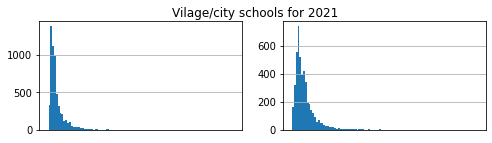

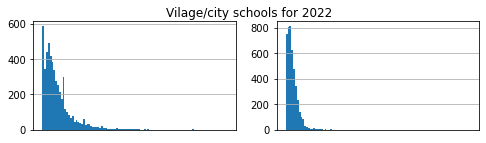

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,2))
zno_vilage_schools.hist(bins=100, ax=ax[0])
ax[0].set_xticks([])
zno_city_schools.hist(bins=100, ax=ax[1])
ax[1].set_xticks([])
print('Vilage/city students counts 2021:', zno_vilage_schools.sum(), zno_city_schools.sum())

fig.suptitle('Vilage/city schools for 2021')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,2))
nmt_vilage_schools.hist(bins=100, ax=ax[0])
ax[0].set_xticks([])
nmt_city_schools.hist(bins=100, ax=ax[1])
ax[1].set_xticks([])
print('Vilage/city students counts 2022:', nmt_vilage_schools.sum(), nmt_city_schools.sum())

fig.suptitle('Vilage/city schools for 2022')

ZNO 2021 t-test	 -35.91317974420624 	 9.308638973782352e-267
NMT 2022 t-test	 -17.214911362079462 	 9.475162302075978e-66


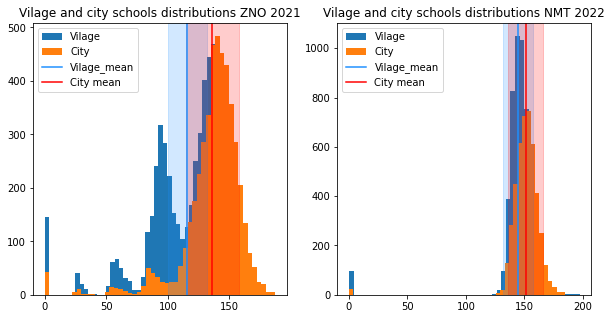

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax= {'ZNO 2021': ax[0], 'NMT 2022': ax[1]}
res_means = {'ZNO 2021': dict(), 'NMT 2022': dict()}
res_std = {'ZNO 2021': dict(), 'NMT 2022': dict()}
for df_name, df, subjects in zip(ax.keys(), [zno_2021_df, nmt_2022_df], [zno_subjects, nmt_subjects]):
    vilage_schools,city_schools = split_by_tertype(df)
    vilage_mean, vilage_std = get_metrics(vilage_schools, subjects, df)
    city_mean, city_std = get_metrics(city_schools, subjects, df)
    t_test(vilage_mean, city_mean, name=df_name)
    
    ax[df_name].hist(vilage_mean, label='Vilage', bins = 50)
    ax[df_name].hist(city_mean, label='City', bins = 50)
    
    ax[df_name].axvline(vilage_mean.mean(), c='dodgerblue', label='Vilage_mean')
    ax[df_name].axvspan(vilage_mean.mean()-vilage_std.mean(),vilage_mean.mean()+vilage_std.mean(), edgecolor='dodgerblue', fc='dodgerblue', alpha=0.2)
    
    ax[df_name].axvline(city_mean.mean(), c='red', label='City mean')
    ax[df_name].axvspan(city_mean.mean()+city_std.mean(), city_mean.mean()-city_std.mean(), edgecolor='red', fc='red', alpha=0.2)
    
    ax[df_name].legend(loc="upper left")
    ax[df_name].set_title(f'Vilage and city schools distributions {df_name}')
    res_means[df_name]['vilage']=vilage_mean.mean()
    res_means[df_name]['city']=city_mean.mean()
    res_std[df_name]['vilage']=vilage_std.mean()
    res_std[df_name]['city']=city_std.mean()        

In [ ]:
md(f'''
**Summary:**

+ Received estimation for **vilage** schools in **2021** ${round(res_means['ZNO 2021']['vilage'],2)}\pm{round(res_std['ZNO 2021']['vilage'],2)}$
+ Received estimation for **city** schools in **2021** ${round(res_means['ZNO 2021']['city'],2)}\pm{round(res_std['ZNO 2021']['city'],2)}$

+ Received estimation for **vilage** schools in **2022** ${round(res_means['NMT 2022']['vilage'],2)}\pm{round(res_std['NMT 2022']['vilage'],2)}$
+ Received estimation for **city** schools in **2022** ${round(res_means['NMT 2022']['city'],2)}\pm{round(res_std['NMT 2022']['city'],2)}$

+ According to T-test results in 2021&2022 vilage schools have biased distribution with lower mean but in 2022
bias lies in the range of estimated standart deviatiation so we can say that there is no significant difference
in vilage and city scores. Also bias can be conected with lower count of represented students from vilages 
because they usualy have lower population density.
+ The gap is less significant in last year results (2022)
''')


**Summary:**

+ Received estimation for **vilage** schools in **2021** $115.8\pm15.88$
+ Received estimation for **city** schools in **2021** $136.18\pm21.23$

+ Received estimation for **vilage** schools in **2022** $144.75\pm12.63$
+ Received estimation for **city** schools in **2022** $151.18\pm14.88$

+ According to T-test results in 2021&2022 vilage schools have biased distribution with lower mean but in 2022
bias lies in the range of estimated standart deviatiation so we can say that there is no significant difference
in vilage and city scores. Also bias can be conected with lower count of represented students from vilages 
because they usualy have lower population density.
+ The gap is less significant in last year results (2022)


## Patterns in choosing examination subjects for men and women

This section will use the Chi-square test with the following hypotheses

$H_0$: the frequency of women selecting subjects is the same as for men

$H_1$: different

Differences in choices are determined by the difference between the expected values and those obtained in the data set.

+ Only the dataset of 2021 is used in this section, because in 2022 all subjects were compulsory
+ Excluded compulsory subjects such as Ukrainian Language and Literature (UML/Ukr), Mathematics (Math/MathSt)

In [ ]:
subjects = zno_subj.copy()
subjects.remove('UML')
subjects.remove('Ukr')
subjects.remove('Math')
subjects.remove('MathSt')
# Spanish failed U-test
subjects.remove('Spa')
subjects_features = [subj+'Ball100' for subj in subjects]

In [ ]:
def split_by_sextype(df):
    iswoman = df['SexTypeName']!='чоловіча'
    isman = df['SexTypeName']=='чоловіча'
    womans = df[iswoman]
    mans = df[isman]
    return womans, mans

In [ ]:
zno_womans, zno_mans = split_by_sextype(zno_2021_df)
zno_woman_choices = zno_womans[subjects_features].count()
zno_man_choices = zno_mans[subjects_features].count()
choices = pd.concat([zno_woman_choices, zno_man_choices],axis=1, keys=['womans', 'mans'])
display(choices)

,womans,mans
HistBall100,108347,91026
PhysBall100,3393,19809
ChemBall100,6217,3592
BioBall100,52002,29410
GeoBall100,54568,58548
EngBall100,64878,62836
FraBall100,315,99
DeuBall100,1198,627


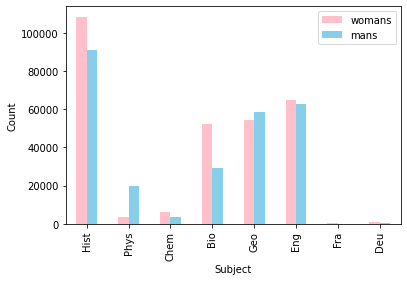

In [ ]:
fig, ax = plt.subplots()
choices.plot.bar(ax=ax, color={'womans': 'pink', 'mans': 'skyblue'})
plt.xticks(range(len(subjects)), subjects)
plt.ylabel("Count")
plt.xlabel("Subject")
display()

In [ ]:
grid = np.array(np.meshgrid(choices.columns, choices.index, sparse=False)).reshape(2,-1)
test_bool_results = {'Subject':[], 'SexTypeName':[], 'BoolCategory':[],'Error':[]}
res = sts.chi2_contingency(choices)
res_bool = res[1]<0.25
res_indx = np.abs(res[3]-choices.to_numpy()).argmax()
res_error = (res[3]-choices.to_numpy()).flatten()[res_indx]
display(md('Excepted values:'))
display(pd.DataFrame(res[3], index=choices.index, columns=choices.columns))
display(md(f"""
|Statistics         | p-value           | Degrees of freedom|
|-------------------|-------------------|-------------------|   
| {round(res[0],4)} | {round(res[1],4)} | {round(res[2],2)} |

Is H_0 rejected: *{res_bool}*

{f'The most unexcepted result: *{grid.T[res_indx]}* with error {-round(res_error,2)} ' if res_bool else ''}


---

"""))
res_error = pd.DataFrame((choices.to_numpy()-res[3]), index=choices.index, columns=choices.columns)

Excepted values:

,womans,mans
HistBall100,104156.652715,95216.347285
PhysBall100,12121.213285,11080.786715
ChemBall100,5124.428115,4684.571885
BioBall100,42531.342814,38880.657186
GeoBall100,59094.179896,54021.820104
EngBall100,66720.482436,60993.517564
FraBall100,216.282316,197.717684
DeuBall100,953.418423,871.581577



|Statistics         | p-value           | Degrees of freedom|
|-------------------|-------------------|-------------------|   
| 19474.7859 | 0.0 | 7 |

Is H_0 rejected: *True*

The most unexcepted result: *['womans' 'BioBall100']* with error 9470.66 


---



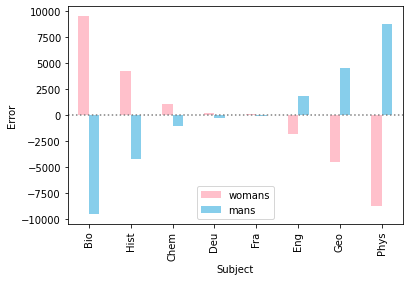

In [ ]:
res_sorted = res_error.sort_values(by='womans', ascending=False)
res_sorted.plot.bar(color={'womans': 'pink', 'mans': 'skyblue'})
plt.xticks(range(len(res_sorted.index)), [ind.replace('Ball100', '') for ind in res_sorted.index])
plt.axhline(ls=':', c='gray')
plt.ylabel("Error")
plt.xlabel("Subject")
display()

In [ ]:
womans_prefer_choices = np.array(subjects)[res_error['womans']>0]
mans_prefer_choices = np.array(subjects)[res_error['mans']>0]
display(md('**Summary:**'))
display(md("Womans frequently choices than mans the next subjects: \n+ "+'\n + '.join(womans_prefer_choices)))
display(md("Mans frequently choices than womans the next subjects: \n+ "+'\n + '.join(mans_prefer_choices)))

**Summary:**

Womans frequently choices than mans the next subjects: 
+ Hist
 + Chem
 + Bio
 + Fra
 + Deu

Mans frequently choices than womans the next subjects: 
+ Phys
 + Geo
 + Eng